In [67]:
import random
import copy
import tqdm
from joblib import Parallel, delayed
%matplotlib inline
import matplotlib.pyplot as plt

def count(n, sock):
    socks = set()
    cnt = 0
    sock_arr = copy.copy(sock)
    while True:
        rnd = random.randint(0, n*2-1)
        
        if sock_arr[rnd] is None:
            continue
        
        if sock_arr[rnd] in socks:
            cnt += 1
            return cnt
        
        else:
            cnt += 1
            socks.add(sock_arr[rnd])
            sock_arr[rnd] = None    
            
def counting(n, tries = 1e5, verbose = False):
    sock_arr = [i//2 for i in range(n*2)]
    cnt = 0
    if verbose:
        itereable = tqdm.tqdm_notebook(range(int(round(tries))))
    else:
        itereable = range(int(round(tries)))
    for i in itereable:
        cnt += count(n, sock_arr)
    return cnt/tries

In [56]:
results = [counting(i, 1e5, verbose=False) for i in tqdm.tqdm_notebook(range(1,101))]

In [64]:
%%time
results = Parallel(n_jobs=8)(delayed(counting)(i) for i in tqdm.tqdm_notebook(range(1,201)))

CPU times: user 1.13 s, sys: 76.1 ms, total: 1.2 s
Wall time: 3min 11s


In [63]:
%%time
results = [counting(i, 1e5, verbose=False) for i in tqdm.tqdm_notebook(range(1,51))]

CPU times: user 1min 8s, sys: 256 ms, total: 1min 8s
Wall time: 1min 8s


In [69]:
%%time
results2 = Parallel(n_jobs=8)(delayed(counting)(i) for i in tqdm.tqdm_notebook(range(201,401)))

CPU times: user 1.14 s, sys: 104 ms, total: 1.25 s
Wall time: 5min 55s


In [70]:
results.extend(results2)

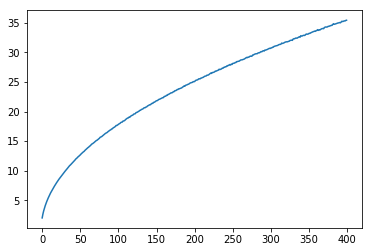

In [71]:
plt.plot(results)

In [72]:
results[19]

7.97331

In [54]:
counting(1, 1e4)

2.0

In [ ]:
tqdm.tqdm_notebook()

In [42]:
counting(10, 1e6)


100%|██████████| 1000000/1000000 [00:09<00:00, 110278.53it/s]

5.678396